# タンパク質の例

## 準備
まず、
https://www.rcsb.org/downloads
にアクセスし、
1UBQのファイルをインストールしてください
ユビキチンというやつみたいです。
展開しまくって、pdb1ubq.ent というファイルがあるので、これをルートに配置してください。

抽出したCα原子数: 76


c:\Users\tsuda\Desktop\TopologicalDataAnalysis\.venv\Lib\site-packages\gudhi\persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


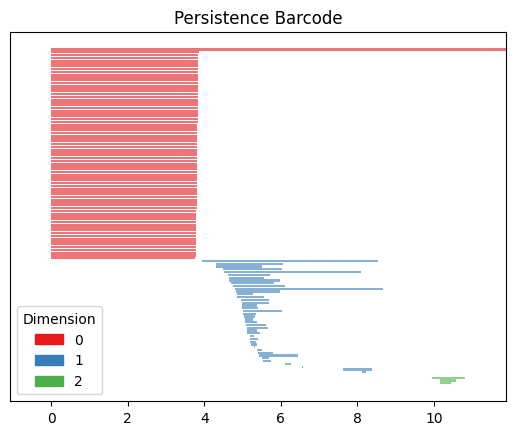

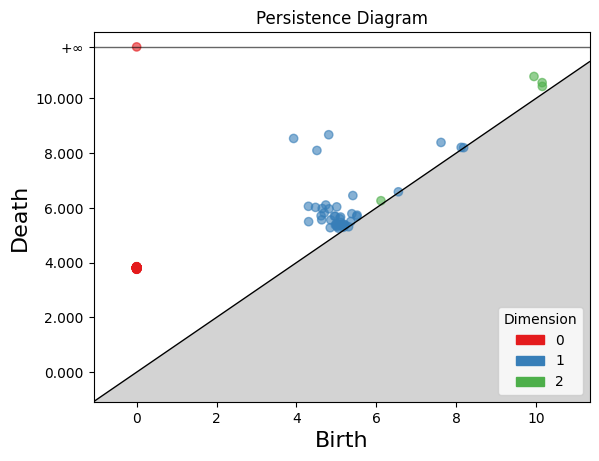

In [1]:
import gudhi
import matplotlib as mpl
# TeXを用いた描画とかがあるらしく、環境にTeXがない場合に警告がでるためTeXを使わないように設定
mpl.rcParams['text.usetex'] = False
from Bio.PDB import PDBParser
from gudhi import RipsComplex
import matplotlib.pyplot as plt

# Cα原子の座標を抽出する関数
def extract_ca_coords(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    coords = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if 'CA' in residue:
                    coords.append(residue['CA'].coord)
    return coords

# パーシステントホモロジーを計算する関数
def compute_persistence(coords, max_edge_length=20.0, max_dimension=3):
    rips_complex = RipsComplex(points=coords, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    diag = simplex_tree.persistence()
    return simplex_tree, diag

# 結果の可視化
def plot_persistence(simplex_tree):
    diag = simplex_tree.persistence()
    # バーコード表示
    gudhi.plot_persistence_barcode(diag)
    plt.title("Persistence Barcode")
    plt.show()

    # パーシステント図表示
    gudhi.plot_persistence_diagram(diag)
    plt.title("Persistence Diagram")
    plt.show()

# 実行
pdb_path = "./pdbfiles/pdb1ubq.ent"  # 例: ユビキチンのPDBファイル（ダウンロードして配置してください）
coords = extract_ca_coords(pdb_path)
print(f"抽出したCα原子数: {len(coords)}")

simplex_tree, diag = compute_persistence(coords)
plot_persistence(simplex_tree)

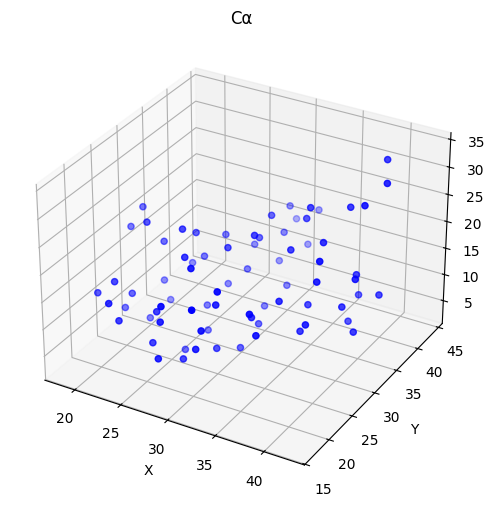

In [3]:
def plot_ca_coords(coords):
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]
    zs = [c[2] for c in coords]
    ax.scatter(xs, ys, zs, c='b', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Cα')
    plt.show()

# 実行
pdb_path = "./pdbfiles/pdb1ubq.ent"
coords = extract_ca_coords(pdb_path)

# 3次元描画
plot_ca_coords(coords)